In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
from skimage.feature import hog
from sklearn import preprocessing

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  #load the dataset

In [48]:
train_hog = []
for trainfeature in x_train:
    #feature extraction of training images
    fd = hog(trainfeature.reshape((28,28)), orientations=9, pixels_per_cell=(7,7),cells_per_block=(1,1))   
    train_hog.append(fd)
hog_trainfeatures = np.array(train_hog, dtype=np.float64)

test_hog = []
for testfeature in x_test:
    #feature extraction of test images
    fd = hog(testfeature.reshape((28,28)), orientations=9, pixels_per_cell=(7,7),cells_per_block=(1,1))
    test_hog.append(fd)
hog_testfeatures = np.array(test_hog, dtype=np.float64)
# hog_testfeatures = np.array(test_hog)

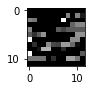

In [25]:
# hog_trainfeatures.shape
plt.subplot(1, 5, 1)
# plt.imshow(np.reshape(x_train[0], (28,28)), cmap=plt.cm.gray)
# plt.imshow(np.reshape(x_train[1], (28,28)), cmap=plt.cm.gray)
# plt.imshow(np.reshape(x_train[2], (28,28)), cmap=plt.cm.gray)
# plt.subplot(1, 5, 1)
# plt.imshow(np.reshape(hog_trainfeatures[0], (12,12)), cmap=plt.cm.gray)
plt.imshow(np.reshape(hog_trainfeatures[1], (12,12)), cmap=plt.cm.gray)
# plt.imshow(np.reshape(hog_trainfeatures[2], (12,12)), cmap=plt.cm.gray)


In [49]:
#pre processing by scaling of training images
preProcess = preprocessing.MaxAbsScaler().fit(hog_trainfeatures)
hog_train = preProcess.transform(hog_trainfeatures)

#pre processing by scaling of test images
preProcess = preprocessing.MaxAbsScaler().fit(hog_testfeatures)
hog_test = preProcess.transform(hog_testfeatures)

In [50]:
#Logistic regression model for classification
lr = LogisticRegression(random_state=42)
lr.fit(hog_train, y_train)

/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
score = lr.score(hog_test, y_test)  # accuracy obtained
print(score)

0.9422


In [29]:
from skimage import feature

In [33]:
#generate LBPH feature 
def getLocalBinaryPattern(img, points, radius):
    lbp = feature.local_binary_pattern(img, points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), 
                bins=np.arange(0, points + 3),
                range=(0, points + 2))

    return lbp, hist

In [43]:
#generate features for each image
def formatDataset():
#     (x_train, y_train), (x_test, y_test) = dataset

    x_train_hst = []
    for i in range(len(x_train)):
        _, hst = getLocalBinaryPattern(x_train[i], 64, 2)
#         print("Computing LBP for training set: {}/{}".format(i, len(x_train)))
        x_train_hst.append(hst)

    print("Done computing LBP for training set!")

    x_test_hst=[]
    for i in range(len(x_test)):
        _, hst = getLocalBinaryPattern(x_test[i], 64, 2)
#         print("Computing LBP for test set: {}/{}".format(i, len(x_test)))
        x_test_hst.append(hst)

    print("Done computing LBP for test set!")

    print("Done!")

    return x_train_hst, y_train, x_test_hst, y_test

In [44]:
#Extract features
x_train_hst, y_train, x_test_hst, y_test = formatDataset()

Done computing LBP for training set!
Done computing LBP for test set!
Done!


In [45]:
x_train_hst = np.array(x_train_hst,dtype=np.float64)
x_test_hst = np.array(x_test_hst,dtype=np.float64)

In [46]:
#training using logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(x_train_hst, y_train)

/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
score = lr.score(x_test_hst, y_test) #accuracy obtained
print(score)

0.5863
